In [1]:
import pandas as pd
from tqdm import tqdm
from top2vec import Top2Vec
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from pathlib import Path
import yaml 
import os
from random import sample
import igraph
from scipy.stats import gaussian_kde

from helpers.linkage import *
from helpers import dataloader
from helpers.afa import adaptive_filter
from helpers.visuals import add_cabinet_periods
from helpers import metrics as mc
from helpers import infodynamics
import seaborn as sns

import seaborn as sns

cf = yaml.safe_load(Path('config.yml').read_text())

/home/rb/.virtualenvs/phd_venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_types = [('lda','speech'),('lda','day'),('t2v','speech')]

In [3]:
## Check Top Speeches for Random Topics, to see if everything went ok with data transforms

random_topics = sample(list(range(100)),5)
data = dataloader.load(cf,agg_level='speech',model_type='lda')
dists = data['dists']
labels = data['labels']
data = data['data']

for t in random_topics:
    print(t, labels[t],'\n---')
    dist_sorted = dists[[t]].reset_index(drop=True).sort_values(t,ascending=False).index.tolist()[:5]
    for i in dist_sorted:
        print(data.lemm_cleaned[i][:250])
    print('==================')

3 public health 
---
polikliniek polikliniek polikliniek polikliniek polikliniek polikliniek polikliniek polikliniek polikliniek enz enz enz enz enz enz enz enz enz enz enz enz enz enz enz enz enz enz
verandering samenstelling ziekenfondsraad ziekenfonds medewerker lang vertegenwoordigen verbod oprichten instelling ziekenhuis tandheelkundig centrum apotheek ziekenfonds medewerking exploitatie
bedrijfsarts behoefte taakafbakening gaan bedrijfsarts taak goed uitoefenen preventie behandeling arts tegenstrijdigheid taakafbakening wet staan
begrip standpunt maatschappij tandheelkunde maatschappij waarvan hoofdbestuur blijk open oog sociaal tandheelkunde voorstellen schooltandverzorgster leiden schakelen voorlichting voeding lokaal chemisch middel verrichten periodiek onderzoek verwijzin
memorie antwoord verwerpen terecht standpunt drogist status wet toekennen verpakken geneesmiddel verkopen standpunt achten groep duperen kruidenier verpakken geneesmiddel verkopen geneesmiddel schadelijk vol

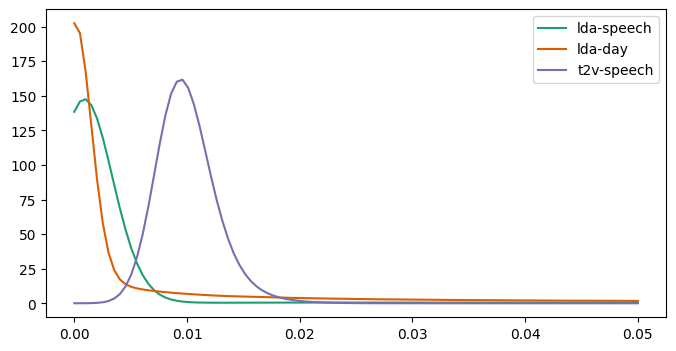

In [4]:
fig,ax = plt.subplots(1,1,figsize=(8,4))

for c,(model_type,agg_level) in enumerate(model_types):
    data = dataloader.load(cf,agg_level=agg_level,model_type=model_type)
    dists = data['dists']
    dist_vals_sample = dists.values.flatten()
    
    density = gaussian_kde(dist_vals_sample)
    x_vals = np.linspace(0,.05,100)
    density.covariance_factor = lambda : .05
    density._compute_covariance()

    ax.plot(x_vals,density(x_vals),color=sns.color_palette('Dark2',3)[c],label=f'{model_type}-{agg_level}')
ax.legend(loc='best')